# Digit Recognizer MNIST Dataset

### The notebook is divided into 4 parts.

#### 1. Data Preparation
    1.1 Loading Data
    1.2 Checking for Null and Missing Values
    1.3 Normalizing the Data
    1.4 Reshaping Data
    1.5 Checking the Dataset for Proper Reshaping
    1.6 One Hot Encoding
    1.7 Splitting Training & Validation Set
    
    
#### 2. CNN Model
    2.1 Creating The Model
    2.2 Setting The Optimizer
    2.3 Compiling The Model
    2.4 Data Augmentation
    
    
#### 3. Evaluating The Model
    3.1 Training And Validation Curves
    3.2 Confusion Matrix
    
    
#### 4. Prediction And Submission
    4.1 Prediction
    4.2 Submission
    
    
This is my first kaggle submission would welcome sugestions and tips.

All the imports that are required and setting random seed for replication of same result.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
%matplotlib inline

np.random.seed(2)

In [2]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


## 1. Data Preparation

In [3]:
import os
%cd ..
%cd dataset

D:\ds\portfolio
D:\ds\portfolio\dataset


In [4]:
# 1.1 Loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
%cd ..
%cd digitrecognizer

D:\ds\portfolio
D:\ds\portfolio\digitrecognizer


In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Saving whole dataset in X_train except the first column which is label
X_train = train.iloc[:,1:]
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Saving the label in Y_train
Y_train = train.iloc[:,0]
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

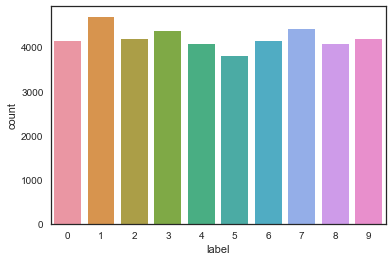

In [10]:
#counting number of observations of each instance
sns.countplot(Y_train)

In [11]:
# 1.2 Checking for null and missing values
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [13]:
#1.3  Normalizing the data
X_train = X_train / 255.0
test = test / 255.0

In [14]:
# 1.4 Reshaping Data
# We need to Reshape the image in 3 dimensions so we can pass it to CNN
# (height = 28px, width = 28px , canal = 1)

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

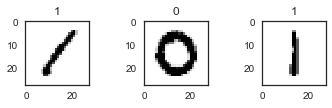

In [15]:
# 1.5 Checking the dataset after Reshaping
for i in range(0, 3):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i][:,:,0])
    plt.title(Y_train[i]);

In [16]:
# 1.6 One Hot Encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [17]:
# 1.7 Splitting training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

## 2. CNN Modeling

In [18]:
# Creating the model

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
# Setting the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [20]:
# Compile the model
model.compile(optimizer = optimizer,
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [25]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [26]:
# Data Augmentation

datagen = ImageDataGenerator(
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1)  # randomly shift images vertically (fraction of total height)
datagen.fit(X_train)

D:\ds\Anaconda3\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (37800, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [27]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_val,Y_val),
                              verbose = 2,
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/30
9s - loss: 0.1698 - acc: 0.9504 - val_loss: 0.0472 - val_acc: 0.9864
Epoch 2/30
9s - loss: 0.1242 - acc: 0.9637 - val_loss: 0.0668 - val_acc: 0.9807
Epoch 3/30
9s - loss: 0.1024 - acc: 0.9695 - val_loss: 0.0368 - val_acc: 0.9890
Epoch 4/30
9s - loss: 0.0931 - acc: 0.9734 - val_loss: 0.0277 - val_acc: 0.9910
Epoch 5/30
9s - loss: 0.0916 - acc: 0.9733 - val_loss: 0.0330 - val_acc: 0.9917
Epoch 6/30
9s - loss: 0.0823 - acc: 0.9760 - val_loss: 0.0322 - val_acc: 0.9893
Epoch 7/30
9s - loss: 0.0799 - acc: 0.9773 - val_loss: 0.0223 - val_acc: 0.9926
Epoch 8/30
9s - loss: 0.0793 - acc: 0.9781 - val_loss: 0.0363 - val_acc: 0.9898
Epoch 9/30
9s - loss: 0.0774 - acc: 0.9785 - val_loss: 0.0449 - val_acc: 0.9893
Epoch 10/30
9s - loss: 0.0813 - acc: 0.9785 - val_loss: 0.0244 - val_acc: 0.9917
Epoch 11/30
9s - loss: 0.0802 - acc: 0.9779 - val_loss: 0.0255 - val_acc: 0.9938
Epoch 12/30
9s - loss: 0.0830 - acc: 0.9781 - val_loss: 0.0357 - val_acc: 0.9881
Epoch 13/30
9s - loss: 0.0837 - acc: 

In [29]:
# Saving the model for future use so do not have to compute
model.save_weights('RMSprop86batches30epochs.h5')

In [ ]:
# Command to load the module
model.load_weights('RMSprop86batches30epochs.h5')

## 3. Evaluating The Model

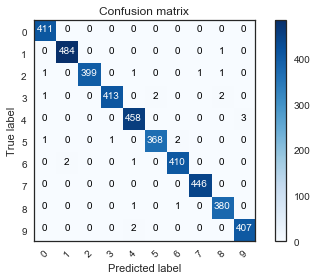

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

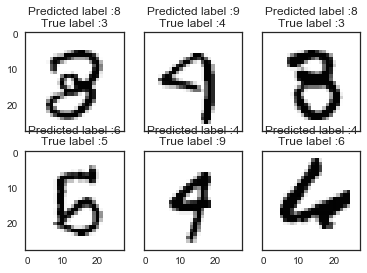

In [31]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 4. Prediction And Submission

In [32]:
# prediction
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [33]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("digit_recognizer_result.csv",index=False)